<a href="https://colab.research.google.com/github/Shruti0196/Audio_Instrument_Segmentation/blob/main/Audio_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

44100
Duration of Audio in Seconds 198.89054421768708
Duration of Audio in Minutes 3.314842403628118


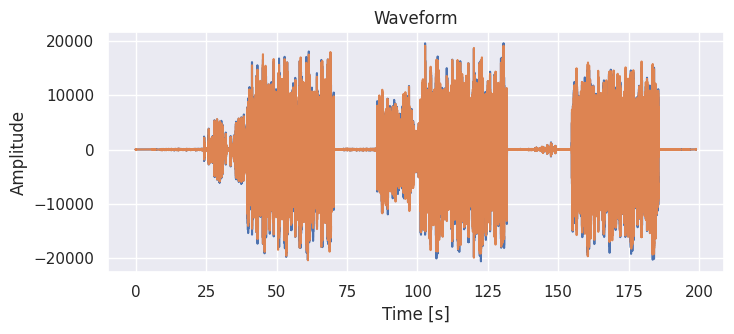

In [16]:
#Amplitude VS Time plot (Waveform)

from scipy.io.wavfile import read
import numpy as np
import matplotlib.pyplot as plt


samplerate, data = read('/content/drive/MyDrive/DMW Datasets/AudioClass/Ariana Grande - One Last Time (Lyric Video) [bass].wav')

print(samplerate)

duration = len(data)/samplerate
print("Duration of Audio in Seconds", duration)
print("Duration of Audio in Minutes", duration/60)

time = np.arange(0,duration,1/samplerate)

plt.plot(time,data)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()

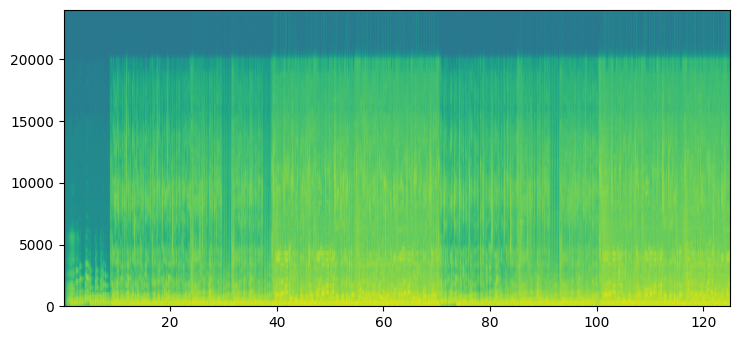

In [8]:
#Spectrogram


import numpy as np

import matplotlib.pyplot as plt

import scipy.io.wavfile as wavfile
Fs, aud = wavfile.read('/content/drive/MyDrive/DMW Datasets/AudioClass/music.wav')

aud = aud[:,0]

first = aud[:int(Fs*125)]
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(first, Fs=Fs)
plt.show()

In [9]:
#Pitch Contour
!pip install praat-parselmouth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 76.2 MB/s eta 0:00:00


In [10]:

import parselmouth

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


snd = parselmouth.Sound("/content/drive/MyDrive/DMW Datasets/AudioClass/music.wav")
snd_part = snd.extract_part(from_time=5.3,to_time = 5.45, preserve_times=True)

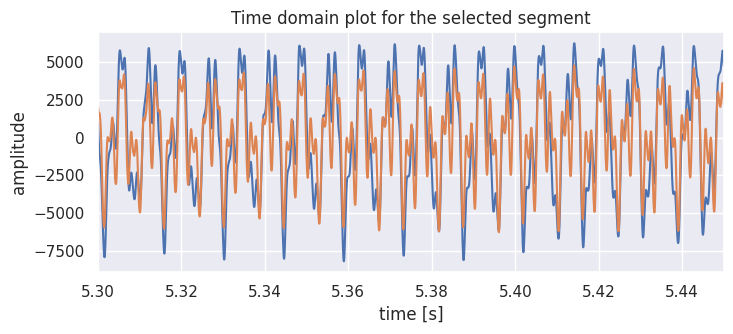

In [11]:
plt.figure()
plt.plot(snd_part.xs(), snd_part.values.T*30853)
plt.xlim([snd_part.xmin, snd_part.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.title("Time domain plot for the selected segment")
plt.show()

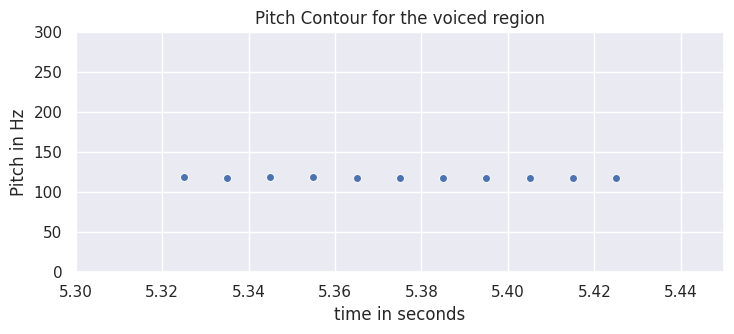

In [12]:
def plot_pitch(pitch):
    pitch_values = pitch.selected_array['frequency']

    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values,'o', markersize=5, color='w')
    plt.plot(pitch.xs(), pitch_values,'o', markersize=4)
    plt.grid(True)
    plt.ylim(0, pitch.ceiling/2)
    plt.ylabel("Pitch in Hz")
    plt.xlabel("time in seconds")

pitch = snd_part.to_pitch()
plt.figure()

plot_pitch(pitch)
plt.xlim([snd_part.xmin, snd_part.xmax])
plt.title('Pitch Contour for the voiced region')
plt.show()

In [13]:
pitch_values = pitch.selected_array['frequency']
pitch_values[pitch_values==0] = np.nan
print("The maximum pitch frequency is = {maximum} Hz , at time t = {time} seconds".format(maximum = np.nanmax(pitch_values), time =  pitch.xs()[np.nanargmax(pitch_values)]))
print("The minimum pitch frequency is = {minimum} Hz , at time t = {time} seconds".format(minimum = np.nanmin(pitch_values), time =  pitch.xs()[np.nanargmin(pitch_values)]))

The maximum pitch frequency is = 118.60515920013678 Hz , at time t = 5.355 seconds
The minimum pitch frequency is = 118.37117969700137 Hz , at time t = 5.385 seconds


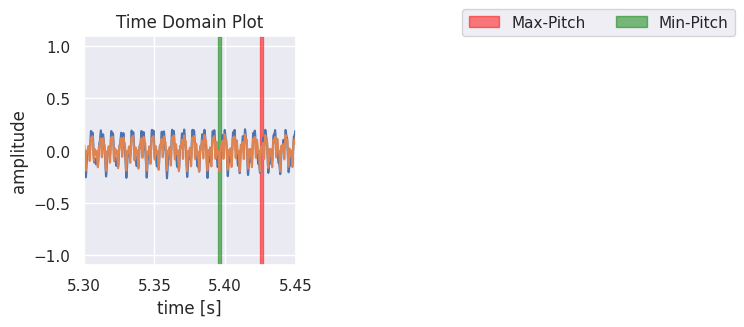

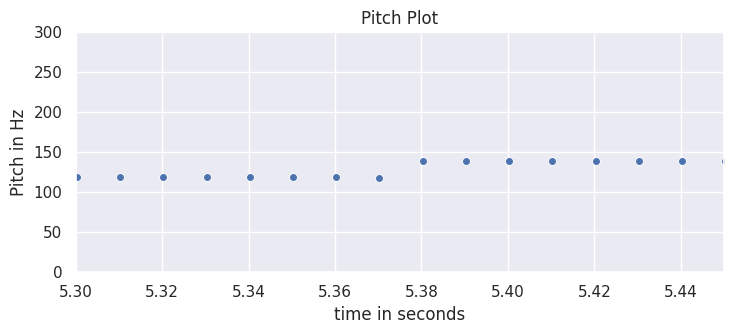

In [14]:
plt.figure()
plt.plot(snd.xs(), snd.values.T)
plt.xlim([snd_part.xmin, snd_part.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.axvspan(5.425,5.427, color = 'red', alpha = 0.5, label = "Max-Pitch")
plt.axvspan(5.395,5.397, color = 'green' , alpha = 0.5, label = "Min-Pitch" )

plt.legend(bbox_to_anchor =(1.75, 1.15), ncol = 2)
plt.title('Time Domain Plot')
plt.show()


pitch = snd.to_pitch()
plt.figure()
plot_pitch(pitch)
plt.title('Pitch Plot')
plt.xlim([snd_part.xmin, snd_part.xmax])
plt.show()